In [ ]:
from zipfile import ZipFile

In [ ]:
with ZipFile('drive/MyDrive/dataset.zip', 'r') as zipObj:
  zipObj.extractall('drive/MyDrive/dataset')

In [ ]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
img_array = cv2.imread('drive/MyDrive/dataset/dataset/training/closed/s0001_00001_0_0_0_0_0_01.png', cv2.IMREAD_GRAYSCALE)

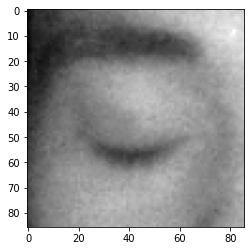

In [ ]:
plt.imshow(img_array, cmap="gray")

In [ ]:
dir_path = "drive/MyDrive/dataset/dataset/training/"

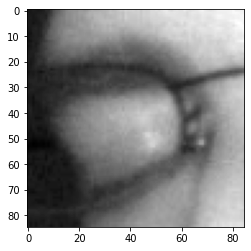

In [ ]:
Classes = ["closed", "open"]

for category in Classes:
  path = dir_path + category

  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
    backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
    plt.imshow(img_array, cmap="gray")
    plt.show()
    break
  break


In [ ]:
img_size = 224

In [ ]:
training_Data = []

def create_training_Data():
  for category in Classes:
    path = dir_path + category
    class_num = Classes.index(category)
    for img in os.listdir(path):
      try: 
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        new_array = cv2.resize(backtorgb, (img_size, img_size))
        training_Data.append([new_array, class_num])
      except Exception as e:
        pass

In [ ]:
create_training_Data()

In [ ]:
print(len(training_Data))

20470


In [ ]:
import random

random.shuffle(training_Data)

In [ ]:
X = []
y = []

for features, label in training_Data:
  X.append(features)
  y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)

In [ ]:
X.shape

(20470, 224, 224, 3)

In [ ]:
Y = np.array(y)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = tf.keras.applications.mobilenet.MobileNet()

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [ ]:
base_input = model.layers[0].input

In [ ]:
base_output = model.layers[-4].output

In [ ]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [ ]:
new_model = keras.Model(inputs = base_input, outputs=final_output)

In [ ]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [ ]:
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
new_model.fit(X, Y, epochs=1, validation_split=0.1)

576/576 [==============================] - 3988s 7s/step - loss: 0.0531 - accuracy: 0.9825 - val_loss: 0.0277 - val_accuracy: 0.9917


In [ ]:
new_model.save('drowsiness_model.h5')

In [ ]:
new_model = tf.keras.models.load_model('drowsiness_model.h5')